**Import libraries and Read Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json

In [2]:
movies_df = pd.read_csv("source_data/movies_metadata.csv")
credits_df = pd.read_csv("source_data/credits.csv")
links_sm_df = pd.read_csv("source_data/links_small.csv")
links_df = pd.read_csv("source_data/links.csv")
ratings_sm_df = pd.read_csv("source_data/ratings_small.csv")
ratings_df = pd.read_csv("source_data/ratings.csv")
tmdb5000_credits_df  = pd.read_csv("source_data/tmdb_5000_credits.csv")
tmdb5000_movies_df = pd.read_csv("source_data/tmdb_5000_movies.csv")
pd.set_option('display.max_columns', None)

C:\Users\chanc\AppData\Local\Temp\ipykernel_24044\1850975939.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("source_data/movies_metadata.csv")


**Step 1: Data Understanding**

In [ ]:
# movies_df.shape                   Return a tuple representing the dimensionality of the DataFrame
# movies_df.head(20)                Shows 20 rows of the DataFrame
# movies_df.dtypes                  This returns a Series with the data type of each column. 
# movies_df.describe()              Generate descriptive statistics.
# movies_df.columns                 Check the columns



**Step 2: Data Preparation**

In [ ]:
# Rename our columns
# movies_df.rename(columns={"id": "ID"}) # {"Name of column": "Replacement of column"}

# Identify missing values
# movies_df.isna().sum()

# Identify duplicated data
# movies_df.loc[df.duplicated()]

# Check for duplicates with subset
# movies_df.loc[df.duplicated(subset=["original_title"])].head(5)

# Checking an example duplicate
# movies_df.query('original_title == "Cape Fear"')

**Step 3: Feature Understanding**

In [ ]:
# ax = movies_df["vote_average"].value_counts() \
#     .head(10) \
#     .plot(kind="bar", title="Voters Average")
# ax.set_xlabel("Ratings")
# ax.set_ylabel("Voters Count")

**Step 4: Feauture Relationships**

In [ ]:
# # sns.pairplot()

movies_df.plot(kind="scatter",
        x="vote_average",
        y = "vote_count",
        title="Voters behavior")
plt.show()

# # sns.scatterplot(x="vote_average",
# #         y = "vote_count",
#         # data=movies_df)      

**Sorting values to see potential insights of the dataset**

In [ ]:
# Sorting values - Vote Count to create an assumption of which movies are popular
movies_df.sort_values(by=["vote_count"], ascending=[False]).head(4)

In [ ]:
movies_df.sort_values(by=["vote_average"], ascending=[False]).head(4)

In [ ]:
movies_df["original_language"].value_counts()

**Delete and Renaming the columns**

In [4]:
# Delete Columns "homepage", "from the movies_df 
movies_df = movies_df.drop(columns={"homepage"}, axis=1)

In [5]:
# Rename all columns from movies_df
movies_df.rename(columns={"adult": "Adult", "belongs_to_collection": "Movie_Collection", "budget": "Budget", "genres": "Genres", "id": "ID", "imdb_id": "IMDB_ID", "original_language": "Original_Language", "original_title": "Original_Title", "overview": "Overview", "popularity": "Popularity", "production_companies": "Production_Companies", "production_countries": "Production_Countries", "release_date": "Release_Date", "revenue": "Revenue", "runtime": "Runtime", "spoken_languages": "Spoken_languages", "status":"Status", "tagline":"Tagline", "title":"Title", "video":"Video", "vote_average":"Ratings", "vote_count":"Voters_Count"}, inplace=True)

In [6]:
movies_df.head()

,Adult,Movie_Collection,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,poster_path,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


**Converting Data type of the columns to the right type**

In [7]:
movies_df.dtypes

Adult                    object
Movie_Collection         object
Budget                   object
Genres                   object
ID                       object
IMDB_ID                  object
Original_Language        object
Original_Title           object
Overview                 object
Popularity               object
poster_path              object
Production_Companies     object
Production_Countries     object
Release_Date             object
Revenue                 float64
Runtime                 float64
Spoken_languages         object
Status                   object
Tagline                  object
Title                    object
Video                    object
Ratings                 float64
Voters_Count            float64
dtype: object

In [8]:
movies_df["Budget"] = pd.to_numeric(movies_df["Budget"], errors="coerce")

In [9]:
movies_df.dtypes["Budget"]

dtype('float64')

**Getting Information about our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column and Memory Requirement**

In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Adult                 45466 non-null  object 
 1   Movie_Collection      4494 non-null   object 
 2   Budget                45463 non-null  float64
 3   Genres                45466 non-null  object 
 4   ID                    45466 non-null  object 
 5   IMDB_ID               45449 non-null  object 
 6   Original_Language     45455 non-null  object 
 7   Original_Title        45466 non-null  object 
 8   Overview              44512 non-null  object 
 9   Popularity            45461 non-null  object 
 10  poster_path           45080 non-null  object 
 11  Production_Companies  45463 non-null  object 
 12  Production_Countries  45463 non-null  object 
 13  Release_Date          45379 non-null  object 
 14  Revenue               45460 non-null  float64
 15  Runtime            

<Axes: >

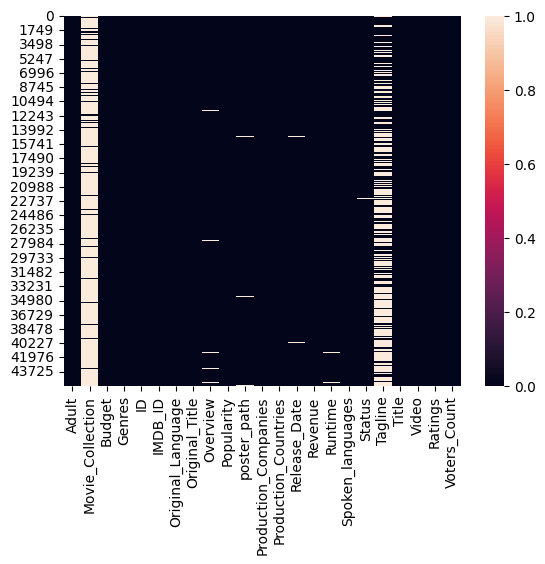

In [11]:
sns.heatmap(movies_df.isnull())

In [12]:
per_missing = movies_df.isnull().sum() * 100 / len(movies_df)
per_missing

Adult                    0.000000
Movie_Collection        90.115691
Budget                   0.006598
Genres                   0.000000
ID                       0.000000
IMDB_ID                  0.037391
Original_Language        0.024194
Original_Title           0.000000
Overview                 2.098271
Popularity               0.010997
poster_path              0.848986
Production_Companies     0.006598
Production_Countries     0.006598
Release_Date             0.191352
Revenue                  0.013197
Runtime                  0.578454
Spoken_languages         0.013197
Status                   0.191352
Tagline                 55.104914
Title                    0.013197
Video                    0.013197
Ratings                  0.013197
Voters_Count             0.013197
dtype: float64

**Drop All The Missing Values**

In [13]:
movies_df["Original_Language"].dropna(axis=0)

0        en
1        en
2        en
3        en
4        en
         ..
45461    fa
45462    tl
45463    en
45464    en
45465    en
Name: Original_Language, Length: 45455, dtype: object

**Check for Duplicate Data**

In [14]:
dup_data = movies_df.duplicated().any()

In [15]:
print("Are there any duplicates values?", dup_data)

Are there any duplicates values? True


**Get Overall Statistics About The DataFrame**

In [16]:
movies_df.describe(include="all")

,Adult,Movie_Collection,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,poster_path,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
count,45466,4494,4.546300e+04,45466,45466,45449,45455,45466,44512,45461,45080,45463,45463,45379,4.546000e+04,45203.000000,45460,45379,20412,45460,45460,45460.000000,45460.000000
unique,5,1698,NaN,4069,45436,45417,92,43373,44307,44176,45024,22708,2393,17336,NaN,NaN,1931,6,20283,42277,2,NaN,NaN
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",NaN,"[{'id': 18, 'name': 'Drama'}]",141971,tt1180333,en,Hamlet,No overview found.,0.0,/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False,NaN,NaN
freq,45454,29,NaN,5000,3,3,32269,8,133,34,5,11875,17851,136,NaN,NaN,22395,45014,7,11,45367,NaN,NaN
mean,NaN,NaN,4.224579e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.120935e+07,94.128199,NaN,NaN,NaN,NaN,NaN,5.618207,109.897338
std,NaN,NaN,1.742413e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.433225e+07,38.407810,NaN,NaN,NaN,NaN,NaN,1.924216,491.310374
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000
50%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000
75%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,NaN,NaN,6.800000,34.000000


**Which language has the highest average Voting**

In [17]:
movies_df.columns

Index(['Adult', 'Movie_Collection', 'Budget', 'Genres', 'ID', 'IMDB_ID',
       'Original_Language', 'Original_Title', 'Overview', 'Popularity',
       'poster_path', 'Production_Companies', 'Production_Countries',
       'Release_Date', 'Revenue', 'Runtime', 'Spoken_languages', 'Status',
       'Tagline', 'Title', 'Video', 'Ratings', 'Voters_Count'],
      dtype='object')

In [35]:
# Present Top Languages
language_counts = movies_df["Original_Language"].value_counts()

# Display the Top 10 results
print("\nTop 10 Languages:")
print(language_counts.head(10))


Top 10 Languages:
Original_Language
en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
Name: count, dtype: int64


In [37]:
# Filter for the languages "en", "ger", "fr", "esp"
top_languages = ["en", "de", "fr", "it", "ja", "es"]

# Filter the DataFrame
filtered_df = movies_df[movies_df["Original_Language"].isin(top_languages)]

In [44]:
# Calculate the average ratings for each language
average_ratings = filtered_df.groupby('Original_Language')['Ratings'].mean()
print(average_ratings)

Original_Language
de    5.863148
en    5.491171
es    5.695171
fr    6.056481
it    5.458797
ja    6.274203
Name: Ratings, dtype: float64


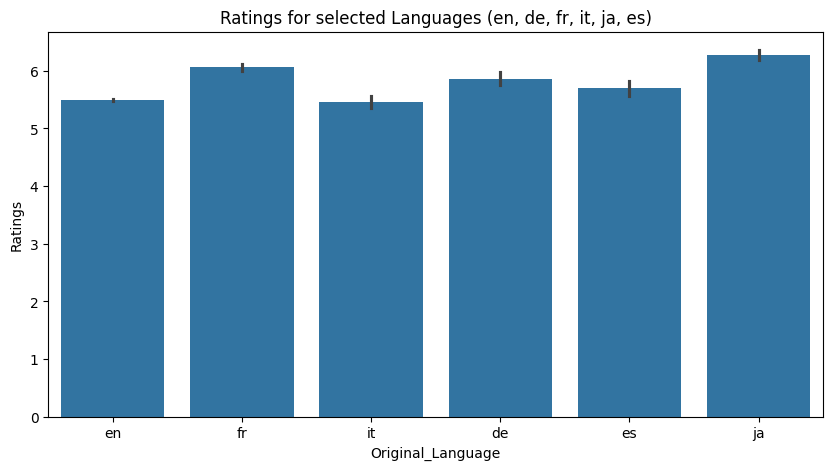

In [41]:
# Create the Bar Plot
plt.figure(figsize=(10,5))
sns.barplot(x="Original_Language", y="Ratings", data=filtered_df)
plt.title("Ratings for selected Languages (en, de, fr, it, ja, es)")
plt.show()

<Axes: xlabel='Original_Language', ylabel='Ratings'>

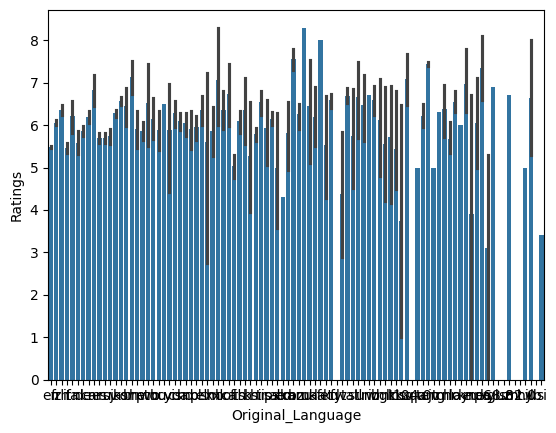

In [19]:
sns.barplot(x="Original_Language", y="Ratings", data=movies_df)